In [0]:
# Import needed packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick as yb
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import model_selection

% matplotlib inline
from IPython.display import display # Allows the use of display() for DataFrames
pd.options.display.max_columns = 500 # To avoid truncated outputs
pd.options.display.max_rows = 50 # To avoid truncated outputs

In [40]:
# Import Dataset
titanic = pd.read_csv('titanic.csv')

# use a copy of the dataset for analysis
df = titanic.copy()

# Explore first five rows.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# Dimension of the dataset
print("The dimension of the dataset is ",df.shape[0] ,' rows and ', df.shape[1], ' columns' )

The dimension of the dataset is  1309  rows and  12  columns


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [43]:
# Make column headers lower case.
df.columns = df.columns.str.lower()
df.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Exploratory Data Analysis

In [44]:
# Describe the dataset 
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [45]:
# Describing the categorical variables
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


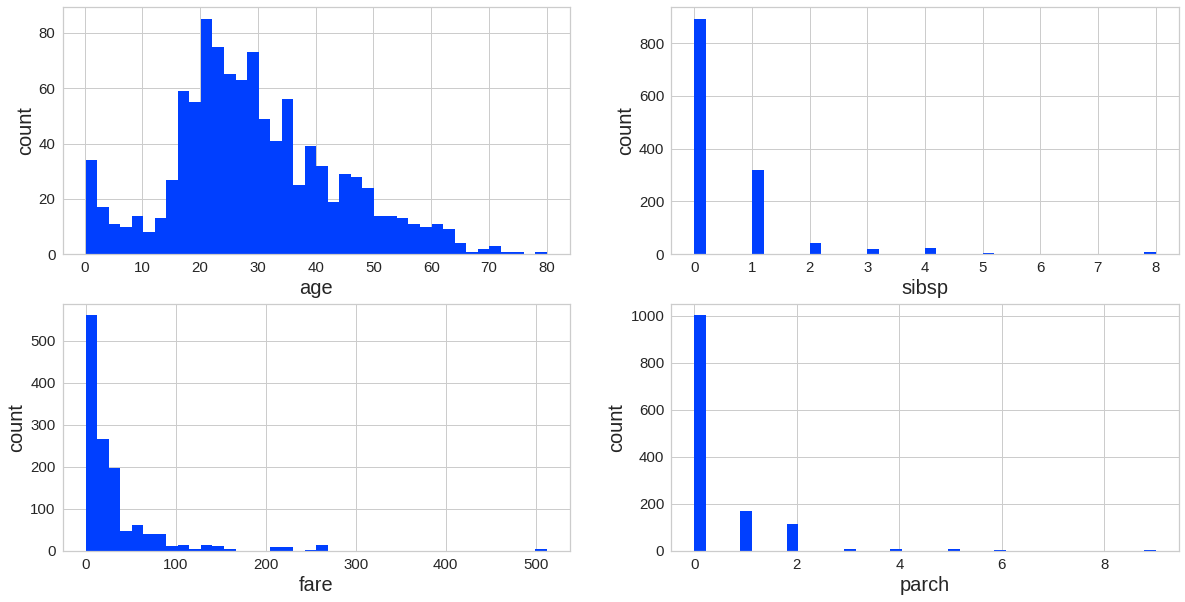

In [46]:
# Plot a Histogram of the Numeric variables.

# Set up the fiig size.
plt.rcParams['figure.figsize'] = (20,10)

# Make Subplots.
fig,axes = plt.subplots(nrows=2,ncols=2)

# Specifying features of interest.
num_features = ['age','sibsp','fare','parch']
xaxes = num_features
yaxes = ['count','count','count','count']

# Draw the histogram
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx],fontsize=20)
    ax.set_ylabel(yaxes[idx],fontsize=20)
    ax.tick_params(axis='both',labelsize=15)
    

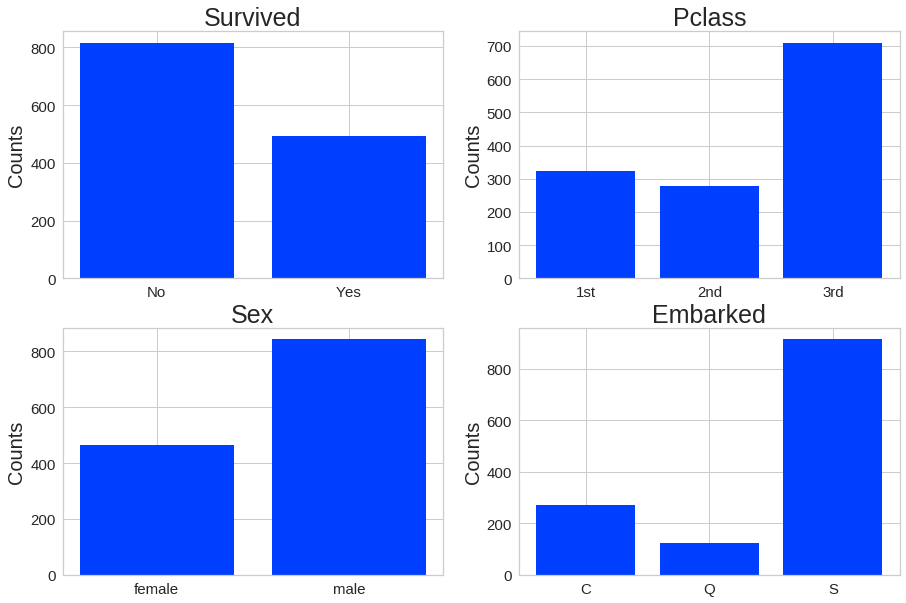

In [47]:
# setup the fig size.
plt.rcParams["figure.figsize"] = (15,10)

# Make Subplot
fig, axes = plt.subplots(nrows=2,ncols=2)

# make dataread to feed into the visualizer.
X_Survived = df.replace({'survived':{1:'Yes',0:'No'}}).groupby('survived').size().reset_index(name='Counts')['survived']
Y_Survived = df.replace({'survived':{1:'Yes',0:'No'}}).groupby('survived').size().reset_index(name='Counts')['Counts']

# Make Barplot.
axes[0,0].bar(X_Survived,Y_Survived)
axes[0,0].set_title('Survived',fontsize=25)
axes[0,0].set_ylabel('Counts',fontsize=20)
axes[0,0].tick_params(axis='both',labelsize=15)


# Make the data read to feed into the visualiser.
X_Pclass = df.replace({'pclass':{1:'1st',2:'2nd',3:'3rd'}}).groupby('pclass').size().reset_index(name='Counts')['pclass']
Y_Pclass = df.replace({'pclass':{1:'1st',2:'2nd',3:'3rd'}}).groupby('pclass').size().reset_index(name='Counts')['Counts']

# Make Barplot.
axes[0,1].bar(X_Pclass,Y_Pclass)
axes[0,1].set_title('Pclass',fontsize=25)
axes[0,1].set_ylabel('Counts',fontsize=20)
axes[0,1].tick_params(axis='both',labelsize=15)

# Make the data to read into visualizer.
X_Sex = df.groupby('sex').size().reset_index(name='Counts')['sex']
Y_Sex = df.groupby('sex').size().reset_index(name='Counts')['Counts']

# Make Barplot.
axes[1,0].bar(X_Sex,Y_Sex)
axes[1,0].set_title('Sex',fontsize=25)
axes[1,0].set_ylabel('Counts',fontsize=20)
axes[1,0].tick_params(axis='both',labelsize=15)

# Make the data read to feed into the visualizer.
X_Embarked = df.groupby('embarked').size().reset_index(name='Counts')['embarked']
Y_Embarked = df.groupby('embarked').size().reset_index(name='Counts')['Counts']

# Make barplots.
axes[1,1].bar(X_Embarked,Y_Embarked)
axes[1,1].set_title('Embarked',fontsize=25)
axes[1,1].set_ylabel('Counts',fontsize=20)
axes[1,1].tick_params(axis='both',labelsize=15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


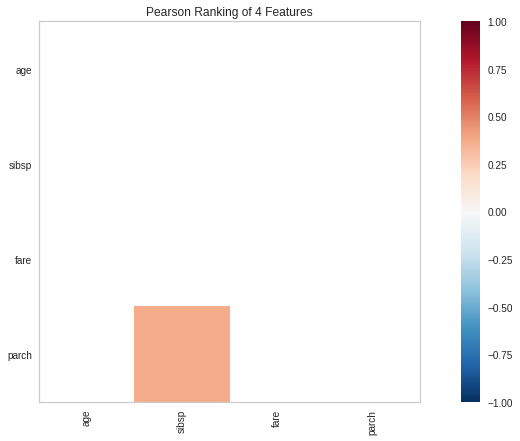

In [48]:
# Are the numeric features correlated.
plt.rcParams['figure.figsize'] = (15,7)

# Import package for visualization of package.
from yellowbrick.features import Rank2D  # yb is yellowbrick

# Extract the numpy array from the dataframe.
X = df[num_features].as_matrix()

# instantiate the visualizer with the covariance ranking algorithm.
visualizer =Rank2D(features=num_features,algorithm='pearson')

visualizer.fit(X)  # Fit data to visualizer.

visualizer.transform(X) # Transform the data.

visualizer.poof()  # Draw/show/poof the data

### Are The Distribution Of Numerical Variables The Same Or Different Among Survived And Not Survived?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


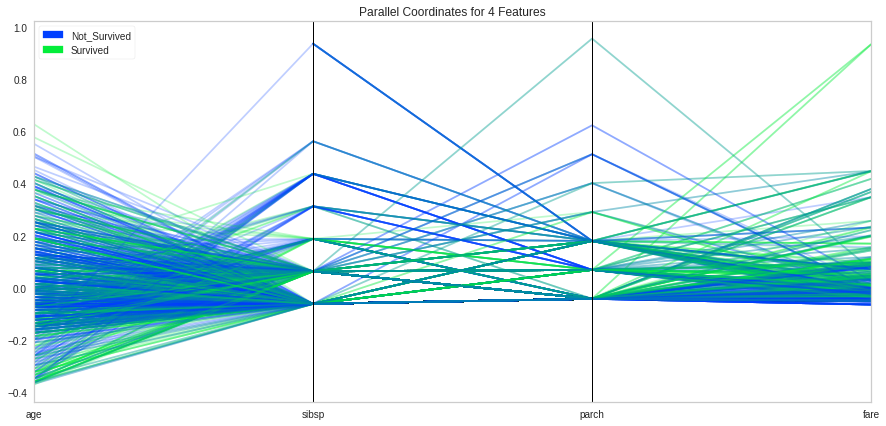

In [49]:
# Set up the Figure and font size
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 50

# Set up colour for yellow brick visualizer.
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target .
classes = ['Not_Survived','Survived']
num_features = ['age','sibsp','parch','fare']

# copy data to a new dataframe.
df_norm = df.copy()

# Normalize data to 0-1.
for feature in num_features:
    df_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy array from the dataframe.
X = df_norm[num_features].as_matrix()
Y = df.survived.as_matrix()

# Instantiate the visualizer 
viz = ParallelCoordinates(classes=classes, features=num_features)

viz.fit(X,Y)   # Fit data to visualizer
viz.transform(X) # Transform the data
viz.poof()       # Draw/show/poof the data.

    

### Are There Different Survival Rates in Different Category?

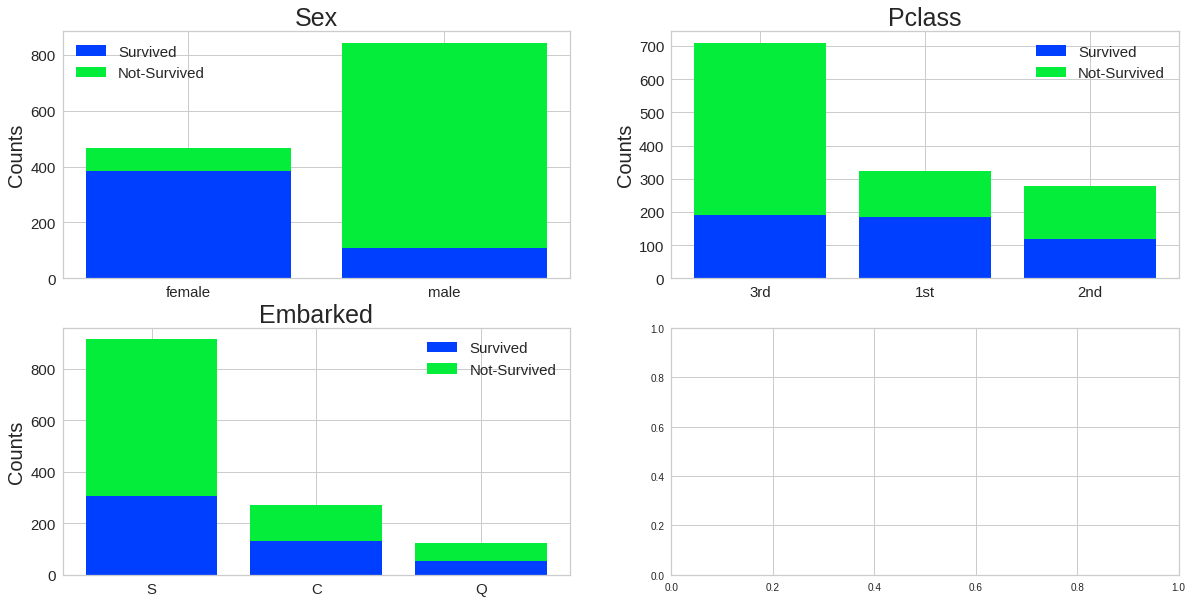

In [50]:
# Set up the figure size.
plt.rcParams['figure.figsize'] = (20,10)

# make subplots 
fig, axes = plt.subplots(nrows=2,ncols=2)

# make the data read to feed into the visualizer.
sex_survived = df.replace({'survived':{1:'Survived',0:'Not-Survived'}})[df['survived'] == 1]['sex'].value_counts()
sex_not_survived = df.replace({'survived':{1:'Survived',0:'Not-Survived'}})[df['survived']==0]['sex'].value_counts()
sex_not_survived = sex_not_survived.reindex(index=sex_survived.index)

# Make the bar plot.
p1 = axes[0,0].bar(sex_survived.index,sex_survived.values)
p2 = axes[0,0].bar(sex_not_survived.index,sex_not_survived.values,bottom=sex_survived.values)

axes[0,0].set_title('Sex',fontsize=25)
axes[0,0].set_ylabel('Counts',fontsize=20)
axes[0,0].tick_params(axis='both',labelsize=15)
axes[0,0].legend((p1[0],p2[0]),('Survived','Not-Survived'),fontsize=15)

# Make the data to feed into the visualizer.
pclass_survived = df.replace({'survived':{1:'Survived',0:'Not-Survived'}}).replace({'pclass':{1:'1st',2:'2nd',3:'3rd'}})[df['survived']== 1]['pclass'].value_counts()
pclass_not_survived = df.replace({'survived':{1:'Survived',0:'Not-Survived'}}).replace({'pclass':{1:'1st',2:'2nd',3:'3rd'}})[df['survived']== 0]['pclass'].value_counts()

pclass_not_survived = pclass_not_survived.reindex(index=pclass_survived.index)

# Make the bar plot
p3 = axes[0,1].bar(pclass_survived.index,pclass_survived.values)
p4 = axes[0,1].bar(pclass_not_survived.index,pclass_not_survived.values,bottom=pclass_survived.values)

axes[0,1].set_title('Pclass',fontsize=25)
axes[0,1].set_ylabel('Counts',fontsize=20)
axes[0,1].tick_params(axis='both',labelsize=15)
axes[0,1].legend((p3[0],p4[0]),('Survived','Not-Survived'),fontsize=15)

# Make the data to feed into the visualiser.
embarked_survived = df.replace({'survived':{1:'Survived',0:'Not-Survived'}})[df['survived']==1]['embarked'].value_counts()
embarked_not_survived = df.replace({'survived':{1:'Survived',0:'Not-Survived'}})[df['survived']==0]['embarked'].value_counts()
embarked_not_survived = embarked_not_survived.reindex(index=embarked_survived.index)

# Make the bar plot.
p5 = axes[1,0].bar(embarked_survived.index,embarked_survived.values)
p6 = axes[1,0].bar(embarked_not_survived.index,embarked_not_survived.values,bottom=embarked_survived.values)

axes[1,0].set_title('Embarked',fontsize=25)
axes[1,0].set_ylabel('Counts',fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)
axes[1,0].legend((p5[0],p6[0]),('Survived','Not-Survived'),fontsize=15);

## Feature Selection and Feature Engineering.

In [51]:
# Dealing with missing values.
# Dealing with Numeric features with missing values.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

num_features = ['age','sibsp','fare','parch','pclass']
df_num = df[num_features].copy()

# Log Transformation.
def log_transform(df):
    return df.apply(np.log1p)

df_num['fare_log'] = log_transform(df_num['fare']).copy()
df_num = df_num.drop('fare',axis=1).copy()

#Initiating the imputer
imputer.fit(df_num)
imputer.statistics_

array([28.        ,  0.        ,  0.        ,  3.        ,  2.73788081])

In [52]:
# Applying the imputer to the dataframe.
X = imputer.transform(df_num)

# Converting to a pandas dataframe.
df_num_tr = pd.DataFrame(X,columns=df_num.columns)
df_num_tr.head(2)

,age,sibsp,parch,pclass,fare_log
0,22.0,1.0,0.0,3.0,2.110213
1,38.0,1.0,0.0,1.0,4.280593


In [53]:
df_num_tr.isnull().sum()

age         0
sibsp       0
parch       0
pclass      0
fare_log    0
dtype: int64

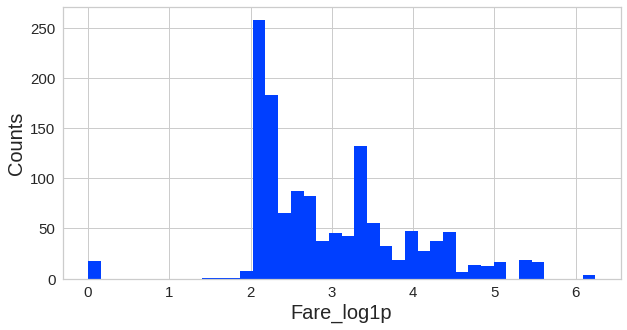

In [54]:
# check the distribution using a histogram.
# Set up the figure size.
plt.rcParams['figure.figsize'] = (10,5)

plt.hist(df_num_tr['fare_log'],bins=40)
plt.xlabel('Fare_log1p',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.tick_params(axis='both',labelsize=15);


In [55]:
# Dealing with Categorcal features wit Missing values.
imputer = SimpleImputer(strategy='most_frequent')

cat_features = ['embarked','sex']
df_cat = df[cat_features]

# Initiating the imputer
imputer.fit(df_cat)
imputer.statistics_

array(['S', 'male'], dtype=object)

In [56]:
# Applying the imputer to the dataframe.
X = imputer.transform(df_cat)

# Convert back to a pandas dataframe
df_cat_tr = pd.DataFrame(X, columns=df_cat.columns)
df_cat_tr.head(2)

,embarked,sex
0,S,male
1,C,female


In [57]:
#Encoding Categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

df_cat_1hot = encoder.fit_transform(df_cat_tr)
df_cat_1hot

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       ...,
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [58]:
encoder.categories_

[array(['C', 'Q', 'S'], dtype=object), array(['female', 'male'], dtype=object)]

In [0]:
#Build a pipeline for the numerical features transformation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
])

In [0]:
# Build a pipeline for the numerical features transformation
cat_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('one_hot',OneHotEncoder(sparse=False)),
])

In [61]:
# full dataframe
df['fare_log'] = log_transform(df['fare'])
df_f = df.drop(['fare','passengerid','survived','name','ticket','cabin'],axis=1).copy()

# pipeline for transformation of both numeric and categorical data.
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = list(df_cat)

full_pipeline = ColumnTransformer([
        ('num',num_pipeline,num_attribs),
        ('cat',cat_pipeline,cat_attribs),
])

df_prepared = full_pipeline.fit_transform(df_f)
df_prepared

array([[-0.58162831,  0.48128777, -0.4449995 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.65865194,  0.48128777, -0.4449995 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.27155825, -0.47908676, -0.4449995 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.6974107 , -0.47908676, -0.4449995 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.11652322, -0.47908676, -0.4449995 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.11652322,  0.48128777,  0.71076309, ...,  0.        ,
         0.        ,  1.        ]])

In [62]:
df_prepared.shape

(1309, 10)

In [63]:
df_label = df['survived']
df_label.shape

(1309,)

In [0]:
# Split out test set.
test = 0.20
seed = 1

x_train,x_test,y_train,y_test = model_selection.train_test_split(df_prepared,df_label,test_size=test,random_state=seed)


In [0]:
# Test Option and evaluation metric
seed = 1
scoring = 'accuracy'


In [66]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.858690 (0.053349)
LDA: 0.861548 (0.048461)
KNN: 0.852949 (0.031626)
CART: 0.827262 (0.043455)
NB: 0.857729 (0.052602)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

SVM: 0.869185 (0.039243)
GBC: 0.864451 (0.044160)
RFC: 0.850119 (0.032603)


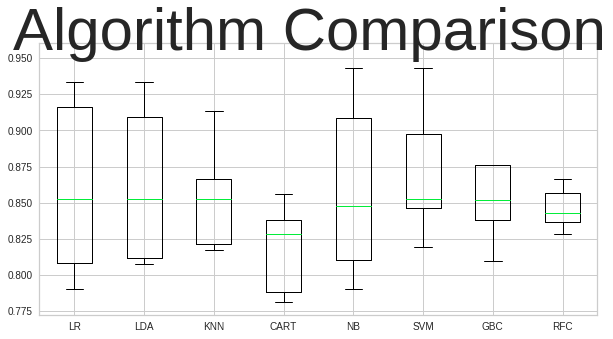

In [67]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [68]:
# Make prediction on validation set using SVM
svm = SVC(gamma='scale')
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8435114503816794
[[139  10]
 [ 31  82]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       149
           1       0.89      0.73      0.80       113

    accuracy                           0.84       262
   macro avg       0.85      0.83      0.84       262
weighted avg       0.85      0.84      0.84       262



## optimizing the chosen SVM model using Random Grid Search

In [69]:
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#kernels
kernel = ['linear','rbf','poly']

# gamma
gamma = [0.1,1,10,100]

# c
C = [0.1,1,10,100]

# degree
degree = [0,1,2]

# define the grid of hyperparameters to search.
hyperparameter_grid = {'kernel': kernel,
                        'gamma' : gamma,
                        'C'     : C,
                        'degree': degree}

In [0]:
model = SVC(random_state=60)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [72]:
random_cv.fit(x_train,y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=60, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=25, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [0, 1, 2],
                                        'gamma': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

In [73]:
random_cv.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=60, shrinking=True, tol=0.001,
    verbose=False)

In [76]:
predictions = best_model.predict(x_train)
score = accuracy_score(y_train,predictions)
score

0.8872970391595033

In [74]:
best_model = random_cv.best_estimator_
best_model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=60, shrinking=True, tol=0.001,
    verbose=False)

In [77]:
test_pred = best_model.predict(x_test)
score = accuracy_score(y_test,test_pred)
score

0.8396946564885496